This code compares three different community ecology models—MCRM, Gibbs, and MiCRM—using consistent initial conditions and metabolic parameters. It creates synthetic consumption (C) and transformation (D) matrices, configures each model’s parameters, runs all three simulations, and visualizes how species abundances change over time for each model. This setup allows for a direct comparison of how different modeling assumptions (e.g., resource leakage, resource quality, or thermodynamic constraints) shape community dynamics and stability.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from CRM.community_models import CommunityModels
from CRM.other_model_testing import CRMBenchmarkEngine

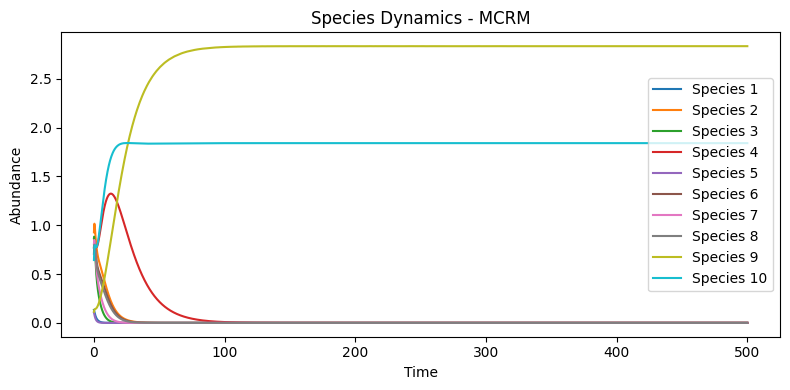

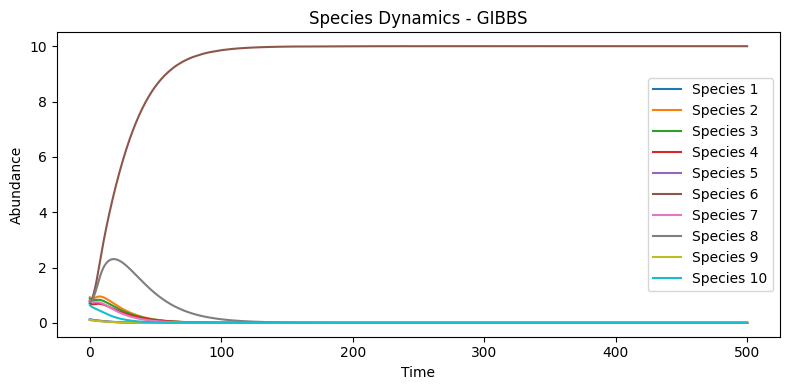

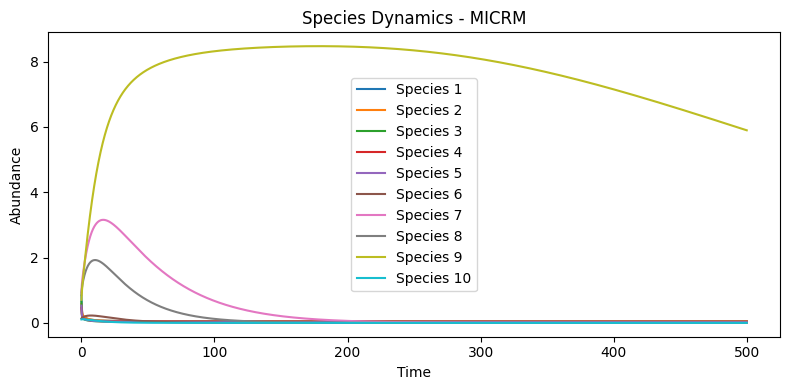

In [58]:
# -------------------- Common Parameters --------------------
num_species = 10         # Number of species in the community
num_resources = 5        # Number of resource types
W_mode = 'species'       # Determines whether resource quality is species-specific or shared
T = 1.0                  # Maintenance cost (minimum resource uptake required for growth)
mu = 1.0                            # Maximum growth rate
death_rate = np.zeros(num_species)  # Death rate per species (set to zero here)
tau = np.ones(num_resources)        # Resource turnover times (1/time units)
alpha = np.ones(num_resources)      # Resource supply rates
B = np.random.rand(num_resources)   # External resource input fractions (background environment)
x0_species = np.random.rand(num_species)       # Initial species abundances
x0_resources = np.random.rand(num_resources)   # Initial resource concentrations

# -------------------- Consumption and Transformation --------------------
C = np.random.rand(num_species, num_resources)  # Species' resource consumption preferences
D = np.random.rand(num_resources, num_resources) * 0.1  # Resource transformation (byproducts, cross-feeding)

# -------------------- Define W Based on Mode --------------------
if W_mode == 'shared':
    W = np.eye(num_resources)  # Shared resource quality: identity matrix (equal value for all species)
elif W_mode == 'species':
    W = np.random.uniform(0.5, 1.5, size=(num_species, num_resources))  # Species-specific resource quality
else:
    raise ValueError("Invalid W_mode. Choose 'shared' or 'species'.")  # Error handling

# -------------------- MCRM Params --------------------
mcrm_params = {
    'num_species': num_species,
    'num_resources': num_resources,
    'C': C,
    'D': D,
    'W': W,
    'B': B,
    'alpha': alpha,
    'tau': tau,
    'death_rate': death_rate,
    'mu': mu,
    'T': T,
    'x0': np.concatenate([x0_species, x0_resources]),  # Combined initial conditions
    'varIdx': {
        'species': list(range(num_species)),  # Indices for species in state vector
        'resources': list(range(num_species, num_species + num_resources))  # Indices for resources
    },
    'W_mode': W_mode
}

# -------------------- Gibbs Model Params --------------------
epsilon = np.ones_like(C.T)  # Thermodynamic efficiencies
P = np.eye(num_resources)  # Stoichiometry for forward reactions
Pt = np.eye(num_resources)  # Stoichiometry for reverse reactions
rho = np.ones(num_resources)  # Maximum resource supply capacity
theta = 0.5  # Thermodynamic interaction strength
eta = np.ones(num_species) * 0.1  # Minimal resource demand per species

gibbs_params = {
    'num_resources': num_resources,
    'C': C.T,  # Transposed to match Gibbs model format (R x S)
    'epsilon': epsilon,
    'P': P,
    'Pt': Pt,
    'rho': rho,
    'theta': theta,
    'eta': eta,
    'R0': x0_resources,  # Initial resource concentrations
    'N0': x0_species  # Initial species abundances
}

# -------------------- MiCRM Params --------------------
leakage = 0.2  # Fraction of resources leaked back into the environment
rho_micrm = np.ones(num_resources)  # Resource supply vector
g = 1.0  # Growth rate scaling
w = np.ones(num_species)  # Biomass yield weights
m = np.ones(num_species) * 0.1  # Maintenance cost

micrm_params = {
    'num_resources': num_resources,
    'C': C,
    'D': D,
    'leakage': leakage,
    'rho': rho_micrm,
    'tau': tau,
    'g': g,
    'w': w,
    'm': m,
    'R0': x0_resources,
    'N0': x0_species
}

# -------------------- Run Models --------------------
model = CommunityModels(
    mcrm_params=mcrm_params,
    gibbs_params=gibbs_params,
    micrm_params=micrm_params
)  # Create a unified simulation object

results = model.run_all(time_step=500, num_points=5000)  # Run all models over time

# -------------------- Plot Species Only --------------------
for model_name, output in results.items():
    X = output['X']  # Time series matrix of all variables
    t = output['t']  # Time points

    if model_name == 'gibbs':
        species_start = num_resources  # Gibbs model stores species after resource indices
    else:
        species_start = 0  # MCRM and MiCRM store species at the beginning

    plt.figure(figsize=(8, 4))
    for i in range(num_species):
        plt.plot(t, X[species_start + i], label=f'Species {i+1}')  # Plot each species' trajectory
    plt.title(f"Species Dynamics - {model_name.upper()}")  # Title with model name
    plt.xlabel("Time")
    plt.ylabel("Abundance")
    plt.legend()
    plt.tight_layout()
    plt.show()  # Show plot

# compare models

In [74]:
# -------------------- SET RANDOM SEED --------------------
np.random.seed(42)

# -------------------- CONFIG --------------------
num_species = 5
num_resources = 5

# -------------------- SHARED INITIAL CONDITIONS --------------------
N0 = np.ones(num_species) * 0.5
R0 = np.ones(num_resources) * 0.5

# -------------------- SHARED PARAMETERS --------------------
C = np.array([
    [1, 0, 0.5, 0, 0],
    [0, 1, 0, 0.5, 0],
    [0.5, 0, 1, 0, 0.5],
    [0, 0.5, 0, 1, 0],
    [0, 0, 0.5, 0, 1]
])
D = np.array([
    [0, 0.2, 0, 0, 0.1],
    [0.1, 0, 0.3, 0, 0],
    [0, 0.1, 0, 0.4, 0.1],
    [0.2, 0, 0.1, 0, 0.2],
    [0.1, 0.1, 0, 0.3, 0]
])
death_vals = np.random.uniform(0.05, 0.1, size=num_species)
tau = np.ones(num_resources)
alpha = np.ones(num_resources)
B = np.ones(num_resources) * 0.1
rho = np.ones(num_resources) * 0.2
leakage = 0.4
g = 1.0
w = np.ones(num_species)


In [75]:
mcrm_params = {
    'num_species': num_species,
    'num_resources': num_resources,
    'C': C,
    'D': D,
    'W': np.eye(num_resources),
    'B': B,
    'alpha': alpha,
    'tau': tau,
    'death_rate': death_vals,
    'mu': 1.0,
    'T': 0.5,
    'x0': np.concatenate([N0, R0]),
    'varIdx': {
        'species': list(range(num_species)),
        'resources': list(range(num_species, num_species + num_resources))
    },
    'W_mode': 'shared'
}

# -------------------- GIBBS PARAMETERS --------------------
P = (D > 0).astype(float)
P /= P.sum(axis=1, keepdims=True)
Pt = P.T
gibbs_params = {
    'num_resources': num_resources,
    'C': C.T,
    'epsilon': np.ones_like(C).T,
    'P': P,
    'Pt': Pt,
    'rho': rho,
    'theta': 0.3,
    'eta': death_vals,   # Use same as death_rate
    'R0': R0,
    'N0': N0
}

# -------------------- MICRM PARAMETERS --------------------
micrm_params = {
    'num_resources': num_resources,
    'C': C,
    'D': D,
    'm': death_vals,  # Same as MCRM death_rate and Gibbs eta
    'leakage': leakage,
    'rho': rho,
    'tau': tau,
    'w': w,
    'g': g,
    'R0': R0,
    'N0': N0
}

In [76]:
# -------------------- RUN + BENCHMARK --------------------
model = CommunityModels(
    mcrm_params=mcrm_params,
    gibbs_params=gibbs_params,
    micrm_params=micrm_params
)
engine = CRMBenchmarkEngine(model, t_max=5000, n_points=5000)
results = engine.run()
print("Benchmark metrics:", results)

Benchmark metrics:    Model  FeasibleSpecies  FeasibleResources  Stable  MaxEigenvalue  Richness  \
0   mcrm            False               True    True  -4.913526e-02         3   
1  gibbs            False               True    True  -6.729085e-09         2   
2  micrm            False               True    True  -1.681485e-03         4   

    Shannon   Simpson  InvSimpson  Evenness  MeanAbundance  VarAbundance  \
0  0.928016  0.452512    2.209885  0.844717       2.395995      0.012405   
1  0.662702  0.530135    1.886312  0.956077      68.770635  11502.493628   
2  1.078737  0.347124    2.880812  0.778144       0.080394      0.000042   

   BrayCurtisMean  BrayCurtisVar      PCA1      PCA2  
0        0.002389       0.000525  0.994062  0.005725  
1        0.068847       0.028660  0.995706  0.003357  
2        0.006234       0.000147  0.852181  0.122499  


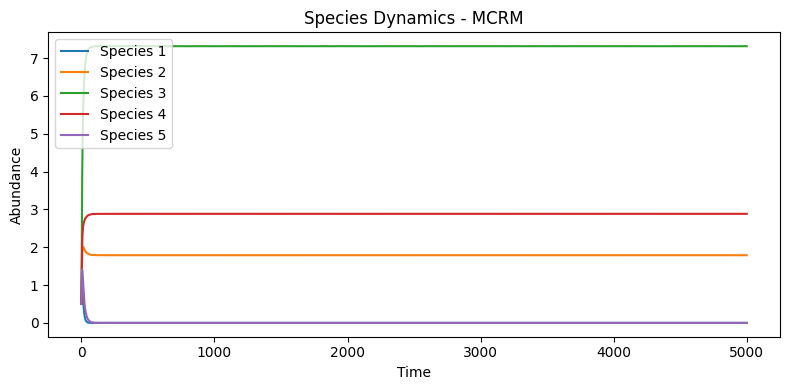

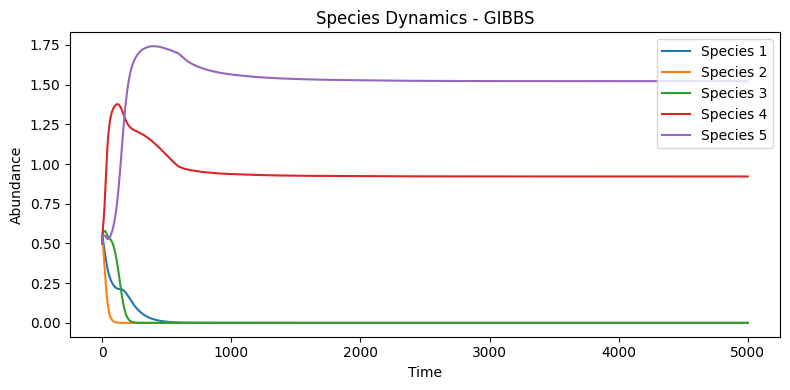

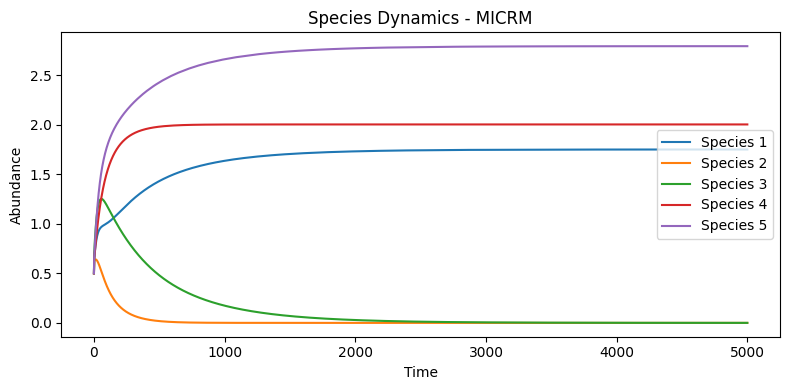

In [77]:
for model_name, output in model.results.items():
    X = output['X']
    t = output['t']
    species = X[:num_species] if model_name == 'mcrm' else X[-num_species:]

    plt.figure(figsize=(8, 4))
    for i in range(num_species):
        plt.plot(t, species[i], label=f'Species {i+1}')
    plt.title(f'Species Dynamics - {model_name.upper()}')
    plt.xlabel("Time")
    plt.ylabel("Abundance")
    plt.legend()
    plt.tight_layout()
    plt.show()